In [84]:
import sys
 
# add python folder
sys.path.insert(0, 'python')

# Imports
import numpy as np
import matplotlib.pyplot as plt
import random
from batch import batch
from tqdm import tqdm
import utils as cSim

In [105]:
# Create batches
filename = "/home/ubuntu/sampled_embeddings.csv"

batch_01 = batch()

print("---- batch 01 -----")
batch_01.load(filename, 1, 10000)

features = 1024
X = np.empty((len(batch_01.items), features), dtype=np.float32)

for i in range(len(batch_01.items)):
    X[i,:] = batch_01.items[i].data

---- batch 01 -----


In [109]:
# starting clusters
k = 4 # hyperparameter
max_iteration = 10 # iterations
noSamples = len(batch_01.items)
classifications = np.zeros(noSamples, dtype = np.float32)
tolerance = 10**(-3)

Indexes = np.random.choice(noSamples, k)
centroids = X[Indexes, :]

# selected cluster coords
print(centroids)


[[ 0.02420044  0.03988647 -0.00615311 ...  0.02558899  0.02375793
   0.02371216]
 [-0.00202179 -0.0324707  -0.02500916 ...  0.00671768  0.04754639
   0.01053619]
 [ 0.01605225  0.00734329  0.00678635 ... -0.01384735  0.00327301
   0.01921082]
 [-0.00592422  0.04797363  0.04013062 ...  0.05688477 -0.04940796
   0.02120972]]


In [110]:
loss = 0
for i in range(0, max_iteration):
    # Compute the classifications
    for i in range(0, noSamples):
      distances = np.zeros(k)
      for j in range(0, k):
        distances[j] = cSim.cosineSimilarity(X[i, :], centroids[j]) # This is norm 2-> np.sqrt(np.sum(np.power(X[i, :] - centroids[j], 2))) 
      classifications[i] = np.argmin(distances)

    # Compute the new centroids and new loss
    new_centroids = np.zeros((k, features))
    new_loss = 0
    for j in range(0, k):
      # compute centroids
      J = np.where(classifications == j)
      X_C = X[J]
      new_centroids[j] = X_C.mean(axis = 0)

      # Compute loss
      for i in range(0, X_C.shape[0]):
        new_loss += cSim.cosineSimilarity(X_C[i, :], centroids[j])# this is norm 2 -> np.sum(np.power(X_C[i, :] - centroids[j], 2))

    # Stopping criterion            
    if np.abs(loss - new_loss) < tolerance:
      break

    centroids = new_centroids
    loss = new_loss
    print(loss)


3026.653088077903
4894.975498467232
4384.898027335891
4399.580819712028
4401.504055248612
4404.222957094091
4409.020181650261
4372.276818942425
4408.393986253531
4262.699739760638


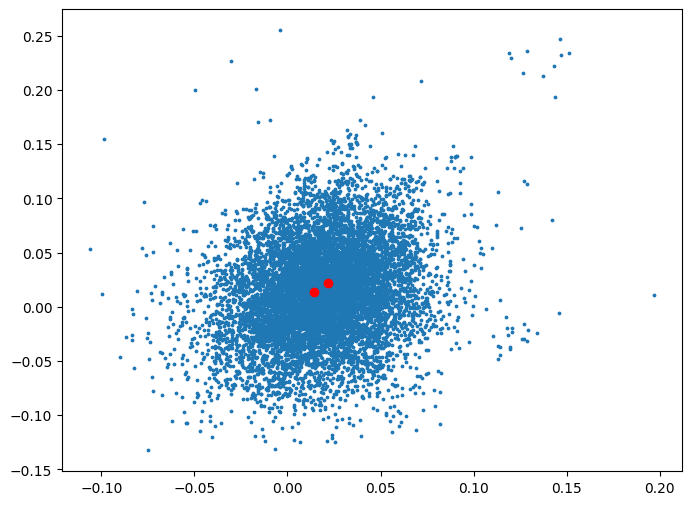

In [92]:
fig = plt.figure(figsize=(8, 6))

# Data
plt.scatter(X[:, 0], X[:, 1], s = 3)

# clusters
plt.scatter(centroids[:,0], centroids[:,0], c="red")
plt.show()

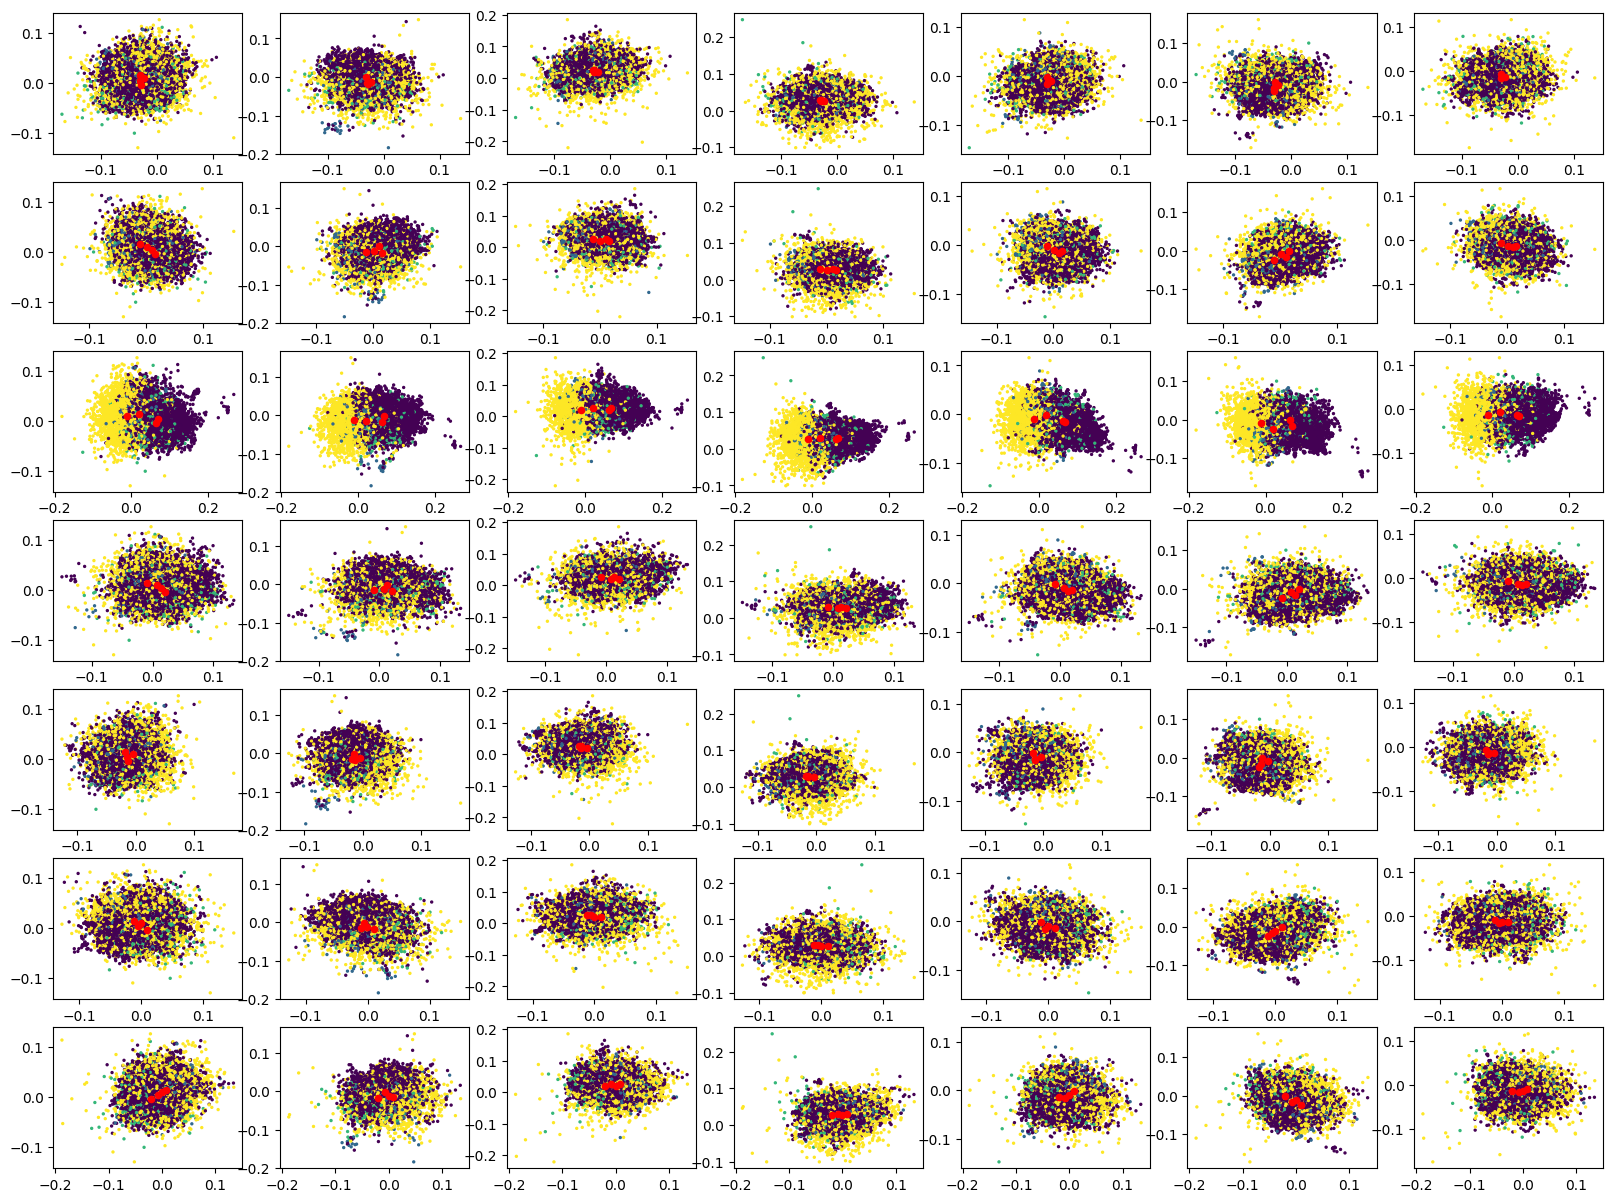

In [111]:
# Plot classification
f1 = 20
f2 = 800

fig = plt.figure(figsize=(20, 15))
fig.tight_layout()

plotNo = 7
for i in range(0, plotNo):
    for j in range(0, plotNo):
        s1 = plt.subplot(plotNo, plotNo, i*plotNo + j + 1)
        s1.scatter(X[:, f1 + i], X[:, f2 + j], c = classifications, s = 2)
        s1.scatter(centroids[:, f1 + i], centroids[:,f2 + j], c = "r", s = 20)

plt.show() 